# material.py
To make plots, one needs to define a material. There are two classes of material: semiconductor and metal. These classes are defined in the `material` module. Metals are defined only through `work_function`, defined as the difference between vacuum level `E0` and Fermi level `Ef`. Here we define Vanadium metal (V)

In [1]:
import material

V = material.metal(work_function=4.3)

Semiconductors need more parameters to be well defined. Most important, the energy gap `Eg`: densities depend exponentially on this parameter. `electron_affinity`, defined as the difference between vacuum and conduction level `Ec`, fixes the built-in potential. Magnitude of bending and depletion region depend on `epsilon`, the DC dielectric constant. Effective masses, `effective_m_e` for electrons and `effective_m_h` contribute less and can be left as default.

In [2]:
Si_p = material.semiconductor(
    Eg=1.12,
    electron_affinity=4.05,
    epsilon=11.7, # optional, by default 1
    doping_type='p', # 'n' or 'p'
    doping=1e16 # in cm-3
) # this definition is a good starting point for plotting

`layer` class wraps a given material with our wanted thickness in acutal device. A list of layers is the only needed parameter to initialize a device.

In [3]:
list_layers = [(1, Si_p), (1.5, V), (1, Si_p)]
layers = [ material.layer(*el) for el in list_layers]

# mat_data.py
Some materials are already defined in an external module, named `mat_data`. Before defining a material, look if the same material is already defined in this module. Metals are called with their atomic symbol, for semiconductors we can specify doping and doping type with a function. A(x)B(1-x)C have an additional parameter `x`

In [4]:
import mat_data

Al = mat_data.Al

Si_n = mat_data.Si(doping_type='n', doping=1e15) # cm-3
Si_p = mat_data.Si(doping_type='p', doping=1e15) # cm-3

AlGaAs = mat_data.AlGaAs(x=0.5, doping_type='n', doping=1e16)

Take a look at `mat_data` before defining a material, it can save your time. 

# band.py
A device is defined through an appropriate list of layers, from left to right. From `layers` variable, initializated in block [3], we can create the needed object:

In [5]:
import band

device = band.band_diagram(layers=layers)

Band diagram contains the four energy levels of relevance: conduction `Ec`, valence `Ev`, Fermi `Ef` and vacuum `E0`. Up to now, this class has only three methods: `apply_voltage()`, `bend()` and `plot()`. Our device has three layers, numbered with 0, 1, 2. First method is used to shift all the four energy levels, specifying the layer and the applied voltage. Note that positive voltage means negative energy shift

In [6]:
device.apply_voltage(volt=0.5, index=1) # applies voltage to Vanadium
device.apply_voltage(volt=-0.5, index=1) # goes back with no consequences

`bend()` is the core method: it will bend `Ec`, `Ev`, `E0` according to Poisson's equation. We can plot before and after bending to see the difference. The code follows some empirical rules, see https://en.wikipedia.org/wiki/Band_diagram#See_also.

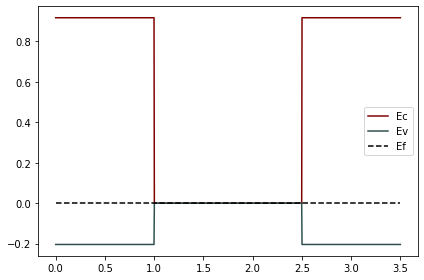

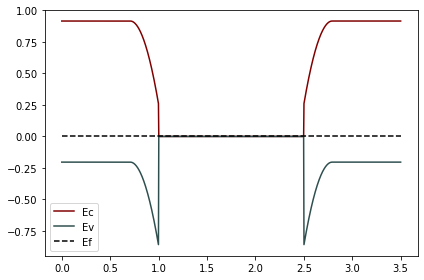

In [7]:
%matplotlib inline

device.plot(display_E0=False)

device.bend()
device.plot() # display_E0 is False by default

There is an additional plotting feature: it displays, with a smoothed red and blue scale, respectively the population of electrons and holes outside the bandgap. For metals it can be misleading, because we are in the same band and we cannot change from electron to hole representation so easily. From the previous example we should simply add:

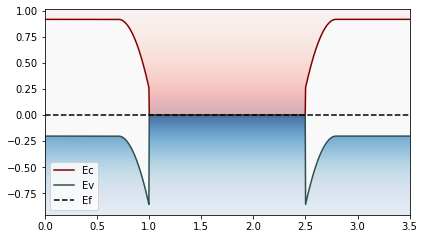

In [8]:
device.plot(display_eh=True)